In [102]:
import MetaTrader5 as mt5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from sklearn.preprocessing import MinMaxScaler

In [103]:
mt5.initialize()

True

In [104]:
mt5.terminal_info()

TerminalInfo(community_account=False, community_connection=False, connected=True, dlls_allowed=False, trade_allowed=False, tradeapi_disabled=False, email_enabled=False, ftp_enabled=False, notifications_enabled=False, mqid=False, build=4169, maxbars=100000, codepage=1251, ping_last=60493, community_balance=0.0, retransmission=0.350708109121088, company='MetaQuotes Software Corp.', name='MetaTrader 5', language='Russian', path='C:\\Program Files\\MetaTrader 5', data_path='C:\\Program Files\\MetaTrader 5', commondata_path='C:\\Users\\HAWK\\AppData\\Roaming\\MetaQuotes\\Terminal\\Common')

In [105]:
end_date = datetime.now()
end_date = end_date - timedelta(days=830)
start_date = end_date-timedelta(days=365)
print(start_date, end_date)

2020-10-30 12:41:07.167615 2021-10-30 12:41:07.167615


In [106]:
gbp_usd = mt5.copy_rates_range("GBPUSD", mt5.TIMEFRAME_H1, start_date, end_date)

In [697]:
data = pd.DataFrame(gbp_usd)

In [698]:
data.tail()

,time,open,high,low,close,tick_volume,spread,real_volume
6192,1635534000,1.36848,1.36869,1.36683,1.36733,6551,0,0
6193,1635537600,1.36733,1.36934,1.36711,1.36933,3852,0,0
6194,1635541200,1.36935,1.36986,1.36880,1.36891,3185,0,0
6195,1635544800,1.36892,1.36906,1.36742,1.36847,3482,0,0
6196,1635548400,1.36844,1.36937,1.36834,1.36920,1839,5,0


<Axes: >

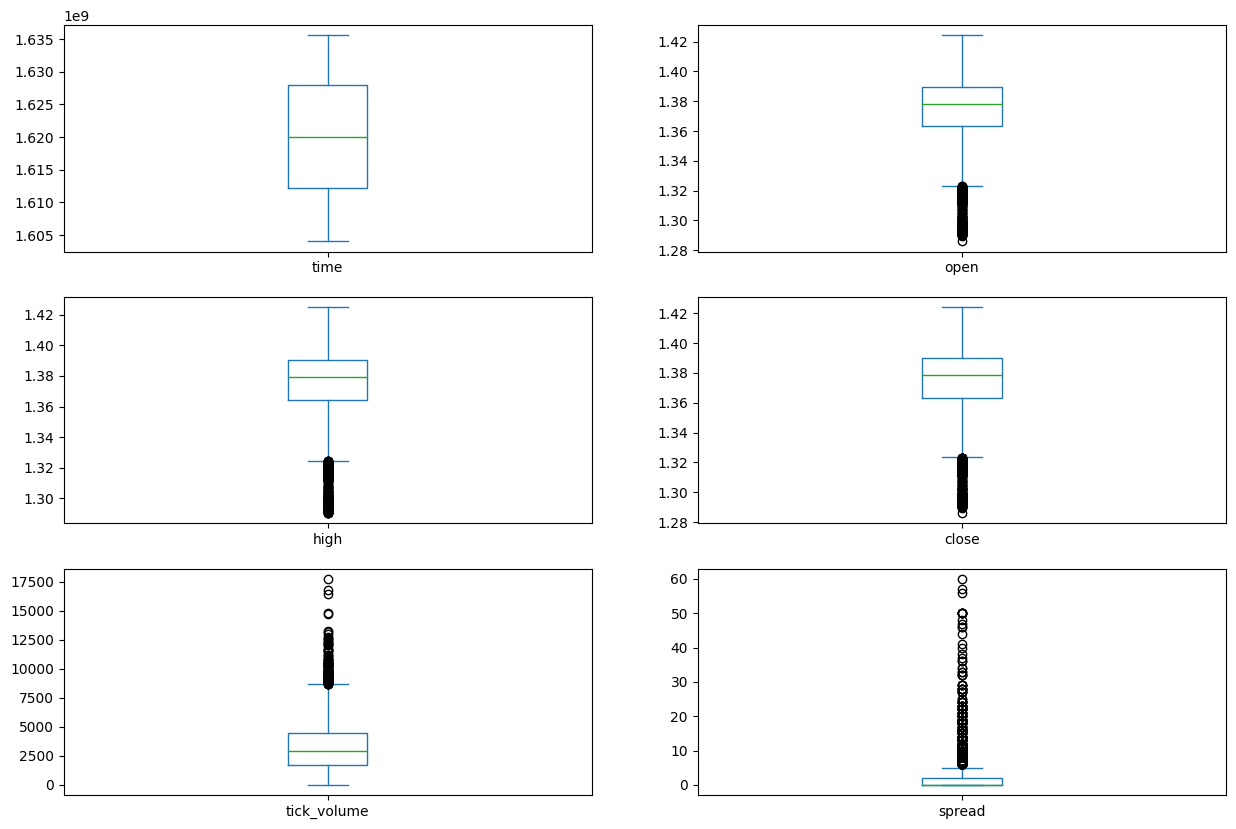

In [699]:
fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15,10))

data['time'].plot(kind='box', ax=axis[0][0])
data['open'].plot(kind='box', ax=axis[0][1])
data['high'].plot(kind='box', ax=axis[1][0])
data['close'].plot(kind='box', ax=axis[1][1])
data['tick_volume'].plot(kind='box', ax=axis[2][0])
data['spread'].plot(kind='box', ax=axis[2][1])

In [700]:
data.pop('time')
data.pop('tick_volume')
data.pop('spread')
data.pop('real_volume')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6197 entries, 0 to 6196
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    6197 non-null   float64
 1   high    6197 non-null   float64
 2   low     6197 non-null   float64
 3   close   6197 non-null   float64
dtypes: float64(4)
memory usage: 193.8 KB


In [199]:
data_2 = data.pop('close')

In [712]:
train_data = data[:4500]
test_data = data[4500:]
train_data_2 = data_2[:4500]
test_data_2 = data_2[4500:]

In [650]:
scaler = MinMaxScaler()
train_data = scaler.fit_transform(train_data)
test_data = scaler.transform(test_data)

In [713]:
train_data = train_data.values.reshape(-1,4)
test_data = test_data.values.reshape(-1,4)

In [213]:
scaler_2 = MinMaxScaler()
train_data_2 = scaler.fit_transform(train_data_2)
test_data_2 = scaler.transform(test_data_2)

In [124]:
test_data = scaler.transform(test_data)

In [125]:
train_data[:5]

array([[0.03947559, 0.02558762, 0.04318215, 0.04875398, 0.20916582,
        0.01666667, 0.        ],
       [0.04831233, 0.04202618, 0.05252862, 0.0696175 , 0.21430184,
        0.        , 0.        ],
       [0.06960742, 0.05467123, 0.06390378, 0.0836714 , 0.17219776,
        0.        , 0.        ],
       [0.08373171, 0.06032431, 0.07911897, 0.08997392, 0.21847838,
        0.        , 0.        ],
       [0.09003332, 0.06173758, 0.07607593, 0.0811359 , 0.18687211,
        0.        , 0.        ]])

In [714]:
train_data.shape

(4500, 4)

In [715]:
test_data.shape

(1697, 4)

In [716]:
def create_sequences(n_past, n_future, data):
   x = []
   y = []
   for i in range(n_past, len(data)- n_future+1):
      x.append(data[i - n_past:i, 0:data.shape[1]])
      y.append(data[i + n_future - 1:i + n_future, 3])
   return np.array(x), np.array(y)

In [717]:
x_train, y_train = create_sequences(12, 1, train_data)
x_test, y_test = create_sequences(12, 1, test_data)

In [628]:
x_train, y_train = create_sequences(24, 1, train_data)

In [655]:
y_train.shape

(4494, 1)

In [656]:
x_train.shape

(4494, 6, 6)

In [657]:
x_test.shape

(1691, 6, 6)

In [658]:
y_test.shape

(1691, 1)

In [718]:
np.save('x_train', x_train)
np.save('y_train', y_train)
np.save('x_test', x_test)
np.save('y_test', y_test)

In [159]:
import tensorflow as tf
model = tf.keras.models.load_model('model')

In [160]:
x_test

array([[[0.65203535, 0.63723594, 0.65403565, ..., 0.07681454,
         0.        , 0.        ],
        [0.64986238, 0.64073193, 0.65367338, ..., 0.07427475,
         0.        , 0.        ],
        [0.65225264, 0.63708718, 0.64773221, ..., 0.20995598,
         0.        , 0.        ],
        ...,
        [0.64232942, 0.63046712, 0.64331256, ..., 0.19426572,
         0.        , 0.        ],
        [0.64493698, 0.63351681, 0.64650051, ..., 0.1628852 ,
         0.        , 0.        ],
        [0.64146023, 0.62890509, 0.64324011, ..., 0.08889265,
         0.        , 0.        ]],

       [[0.64986238, 0.64073193, 0.65367338, ..., 0.07427475,
         0.        , 0.        ],
        [0.65225264, 0.63708718, 0.64773221, ..., 0.20995598,
         0.        , 0.        ],
        [0.64305374, 0.63113657, 0.63700913, ..., 0.32277909,
         0.        , 0.        ],
        ...,
        [0.64493698, 0.63351681, 0.64650051, ..., 0.1628852 ,
         0.        , 0.        ],
        [0.6

In [719]:
x_test.shape

(1685, 12, 4)

In [162]:
y = model.predict(x_test)

53/53 [==============================] - 1s 7ms/step


In [163]:
y.shape

(1673, 1)

In [164]:
y_test.shape

(1673, 1)

In [165]:
np.unique(y)

array([0.39352134, 0.39457616, 0.39477587, ..., 0.72686934, 0.7279427 ,
       0.72826195], dtype=float32)

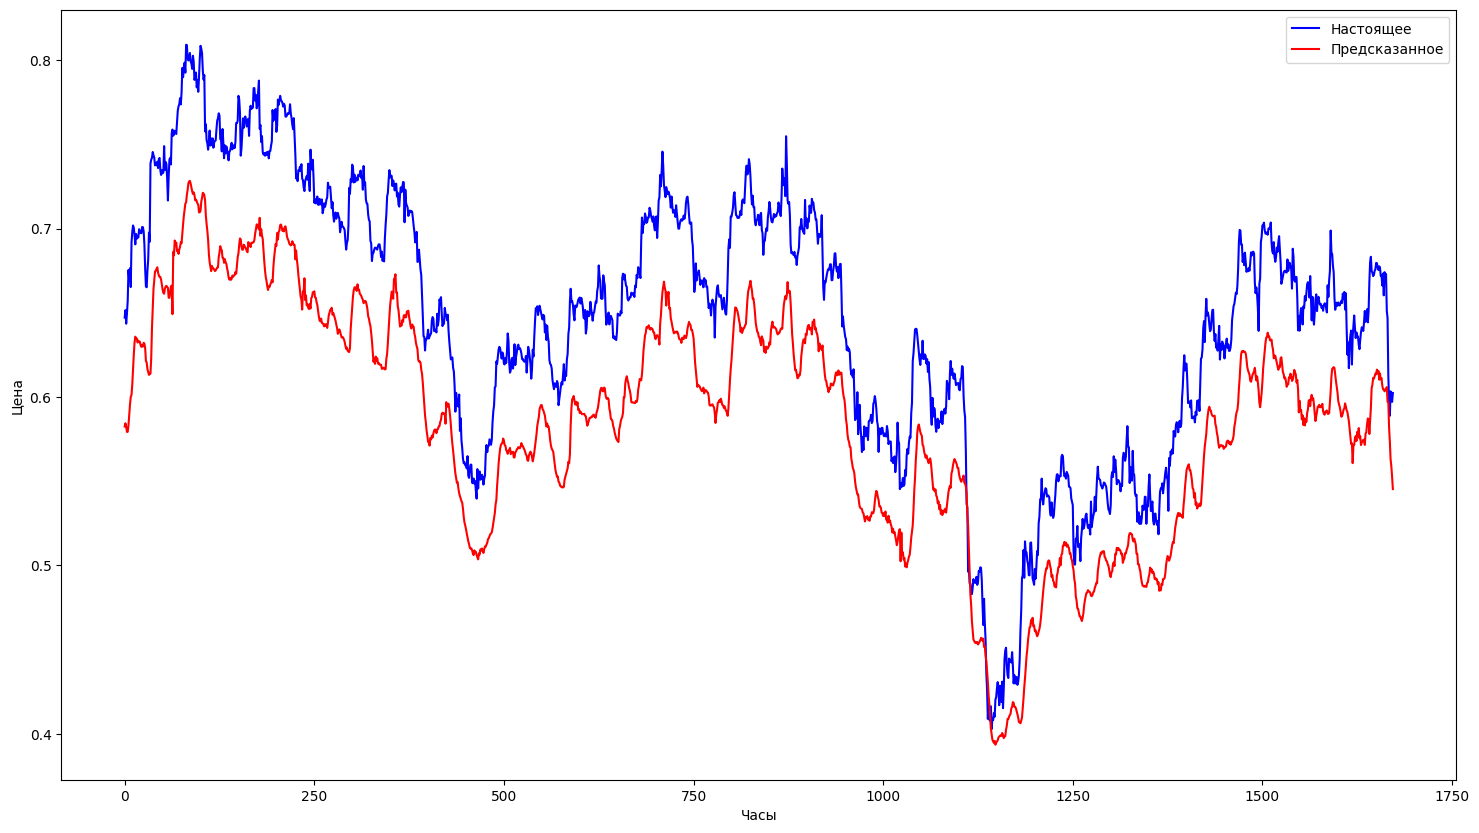

In [174]:
plt.figure(figsize=(18,10))
plt.plot(y_test,color = 'b', label = 'Настоящее')
plt.plot(y,color='red', label = 'Предсказанное')
plt.xlabel("Часы")
plt.ylabel("Цена")
plt.legend()
plt.show()

In [175]:
x_test.shape

(1673, 24, 7)

In [ ]:
np.concatenate()

In [186]:
x_sequence = x_test[0]
x_sequence = x_sequence.reshape(1,24,7)

In [187]:
y_sequence = model.predict(x_sequence)

1/1 [==============================] - 0s 21ms/step


In [188]:
y_sequence

array([[0.58246124]], dtype=float32)

In [267]:
x_sequence = x_test[0]
y = 1
x_sequence

array([[0.64973921],
       [0.65256447],
       [0.64307447],
       [0.639235  ],
       [0.63090409],
       [0.63351203],
       [0.6343089 ],
       [0.63365691],
       [0.65654883],
       [0.64524775],
       [0.64474065],
       [0.64394378],
       [0.65082585],
       [0.65118806],
       [0.64662417],
       [0.64423356],
       [0.64169806],
       [0.64749348],
       [0.65053608],
       [0.64923211],
       [0.64235004],
       [0.64495798],
       [0.64148073],
       [0.6427847 ]])

In [268]:
x_sequence = np.row_stack((x_sequence[1:], y))
x_sequence

array([[0.65256447],
       [0.64307447],
       [0.639235  ],
       [0.63090409],
       [0.63351203],
       [0.6343089 ],
       [0.63365691],
       [0.65654883],
       [0.64524775],
       [0.64474065],
       [0.64394378],
       [0.65082585],
       [0.65118806],
       [0.64662417],
       [0.64423356],
       [0.64169806],
       [0.64749348],
       [0.65053608],
       [0.64923211],
       [0.64235004],
       [0.64495798],
       [0.64148073],
       [0.6427847 ],
       [1.        ]])

In [720]:
def predict_sequence(model_, steps, sequence) -> np.ndarray:
    predicted_values = []
    x_sequence = sequence
    for i in range(steps):
        y_pred = model_.predict(x_sequence)
        x_sequence = np.row_stack((x_sequence[0][1:], y_pred))
        x_sequence = x_sequence.reshape(sequence.shape)
        predicted_values.append(y_pred)
    return np.array(predicted_values), x_sequence

In [721]:
model_2 = tf.keras.models.load_model('model_2')

In [665]:
y_test = scaler.inverse_transform(y_test)

TypeError: 'MinMaxScaler' object is not subscriptable

In [725]:
y_pred = model_2.predict(x_test)[:100]

53/53 [==============================] - 0s 3ms/step


In [726]:
(y_pred-y_test[:100]).mean()

-0.0050088553661346395

In [643]:
n_predicts = 1000

In [644]:
from_ = 80
to_ = from_+12

In [645]:
predictions, sequence = predict_sequence(model_2, n_predicts, y_test[from_:to_].reshape(1,12,1))

1/1 [==============================] - 0s 20ms/step


In [646]:
y_predictions = predictions.reshape(-1)

In [647]:
y_test_unscaler = scaler.inverse_transform(y_train[to_:to_+n_predicts].reshape(-1,1))
y_predictions_unscaler = scaler.inverse_transform(y_predictions.reshape(-1,1))

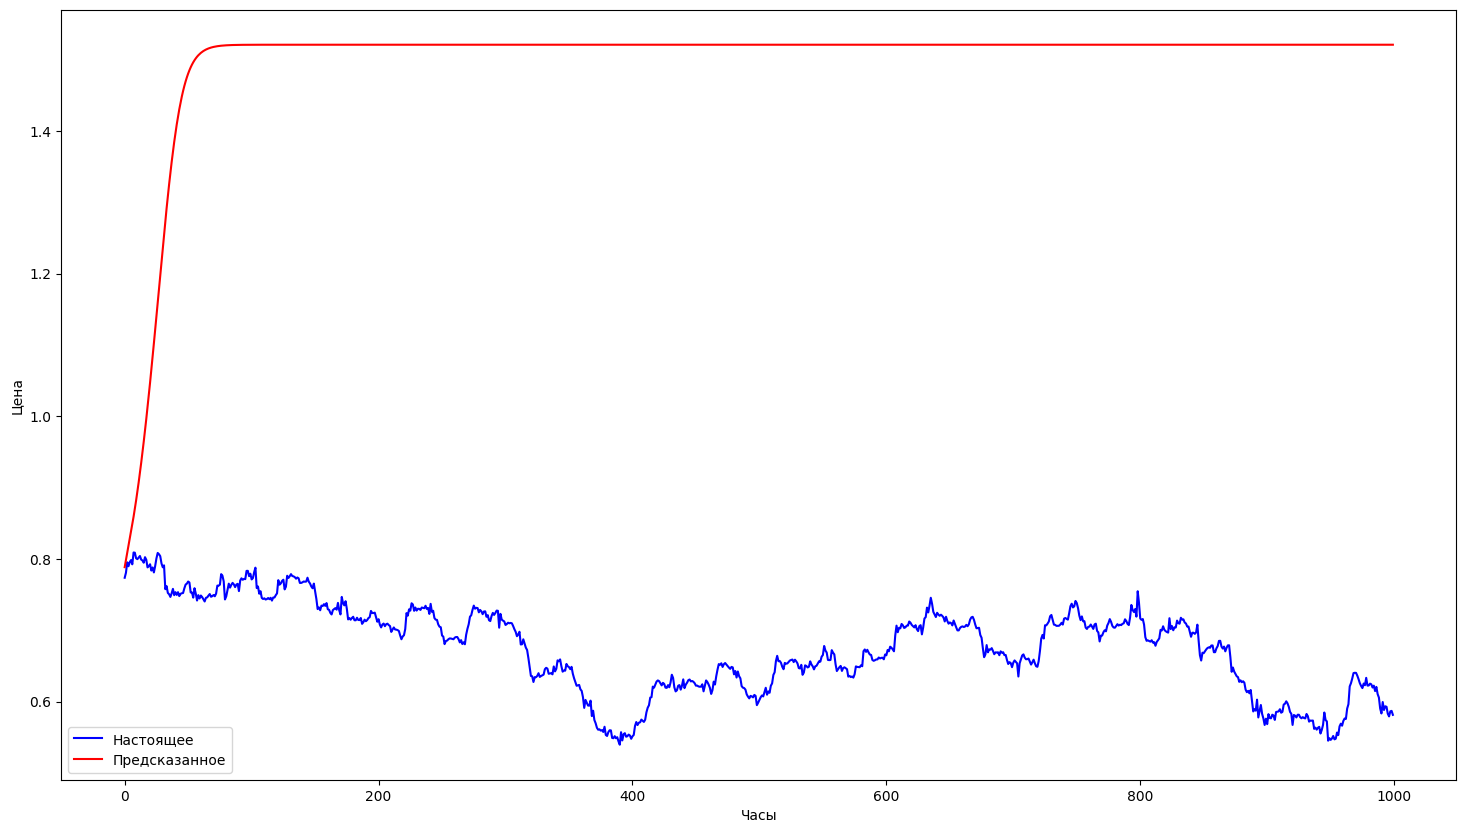

In [648]:
plt.figure(figsize=(18,10))
plt.plot(y_test[to_:to_+n_predicts], color = 'b', label = 'Настоящее')
plt.plot(y_predictions, color='red', label = 'Предсказанное')
plt.xlabel("Часы")
plt.ylabel("Цена")
plt.legend()
plt.show()